In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as stats


## Graph Social Media Hours by Relationship Status

In [2]:
# Read the data
df = pd.read_csv("data/cleaned_smmh.csv")

df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,...,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,5,2,3,2,5,4,5,43
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,4,5,1,1,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,2,5,4,3,3,1,4,2,5,35
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,3,5,1,2,4,3,2,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,4,5,5,3,3,3,4,4,1,44


In [3]:
# Get total count of participants in survey
participant_count = df["Age"].count()
print(f'number of participants: {participant_count}')

number of participants: 481


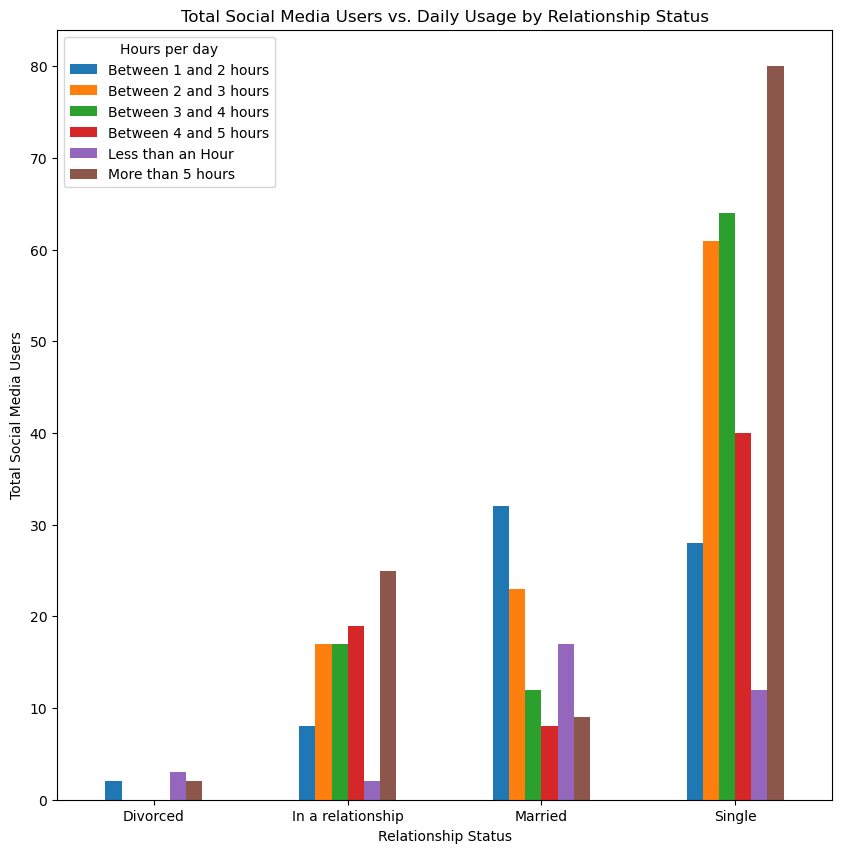

In [7]:
# Plot figure showing total number of users per usage broken down by relationship status
relationship_count = df.groupby(['Relationship status', 'Hours per day']).size().unstack()

relationship_count.plot(kind='bar', figsize=(10,10))

plt.title("Total Social Media Users vs. Daily Usage by Relationship Status")
plt.ylabel("Total Social Media Users")
plt.xlabel("Relationship Status")
plt.xticks(rotation=0)

plt.show()

## Graph Total Mental Health Score by Relationship Status

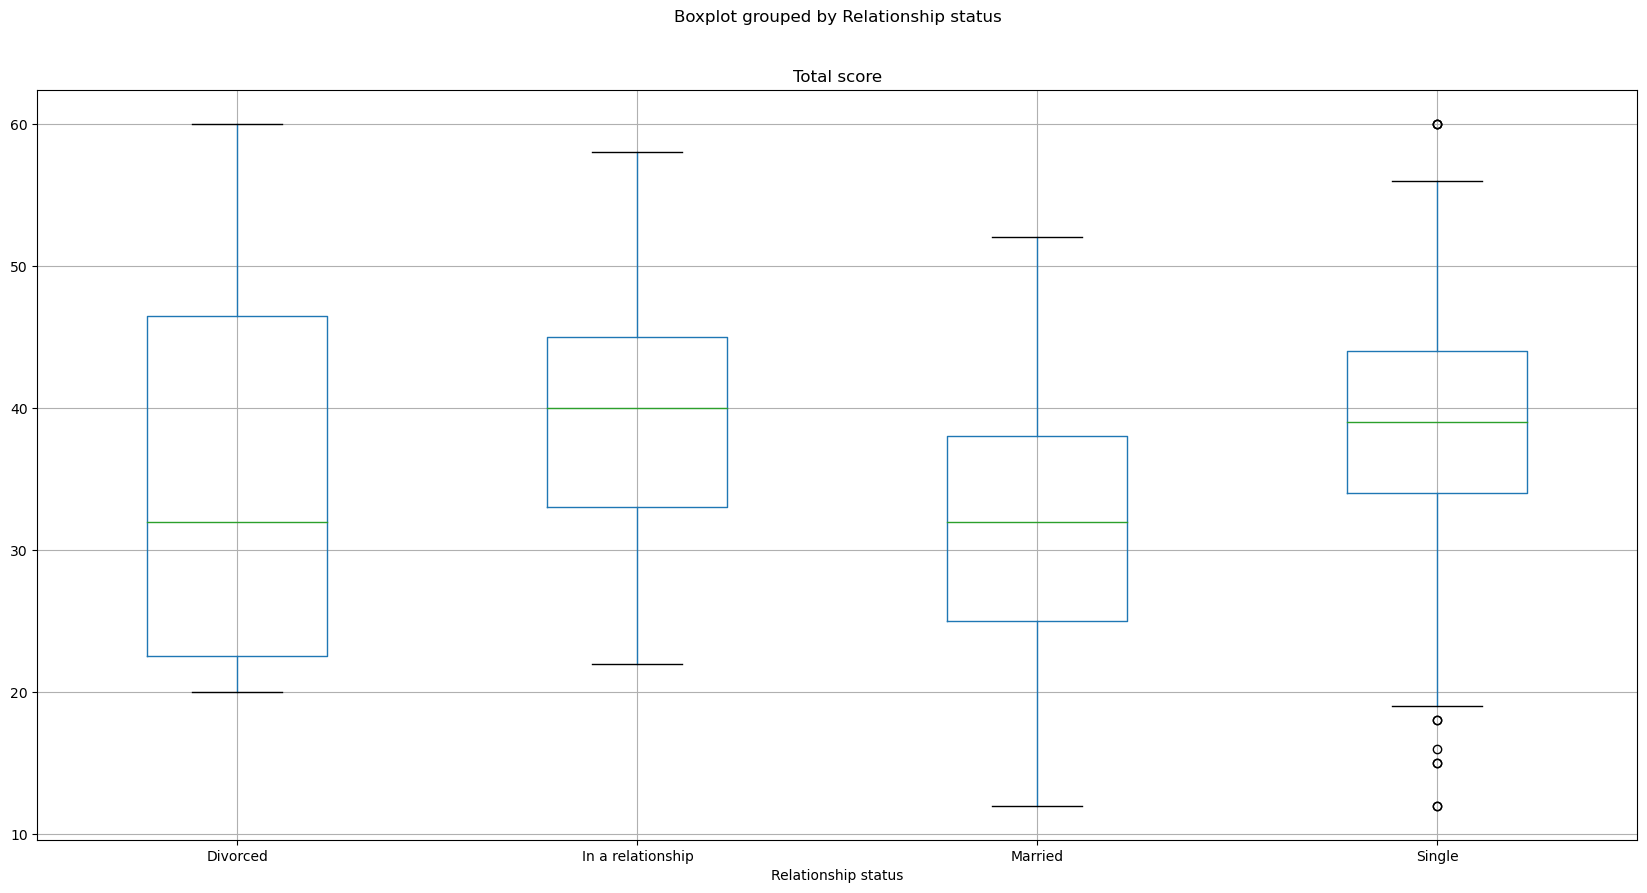

In [5]:
# Graph total mental health score by relationship status
df.boxplot("Total score", by="Relationship status", figsize=(20,10))
plt.show()

From this boxplot, we can see that participatns who are married scored lower on total mental health score signifying that they do not display mental health concerns as compared to other participants.

### ANOVA -- Relationship Status vs. Mental Health Score

In [6]:
g1 = df[df['Relationship status'] == "Divorced"]["Total score"]
g2 = df[df['Relationship status'] == "In a relationship"]["Total score"]
g3 = df[df['Relationship status'] == "Married"]["Total score"]
g4 = df[df['Relationship status'] == "Single"]["Total score"]

stats.f_oneway(g1, g2, g3, g4)

F_onewayResult(statistic=16.285577157702356, pvalue=4.307802517492469e-10)

Since pvalue is less than .5, we conclude that the results are statistically significant.